# Principal component analysis (PCA)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data =  np.loadtxt('Assignment 4 - Online 1/pca_data_online_1.txt', delimiter=' ')
data.shape

(1000, 500)

## Standardization

In [13]:
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
standardized_data = (data - mean) / std
standardized_data


array([[ 1.27855358,  1.16431909, -1.57875089, ..., -2.13166197,
         0.10199063,  0.95431128],
       [-0.29669722,  0.44254914,  0.48810634, ...,  0.44938634,
        -1.08645289, -0.29083561],
       [-1.51564586, -0.45300744, -0.32246672, ...,  1.12153582,
        -0.84784775, -1.56192523],
       ...,
       [-0.19514131, -0.11573497,  0.69214337, ...,  1.13669986,
        -0.21734283, -0.01949516],
       [ 0.87550727, -1.03253311,  0.43848457, ..., -0.55637671,
        -0.02843097,  0.90517693],
       [ 0.87968239, -0.25086523, -0.76140393, ..., -1.07056762,
         0.13225714,  0.25113184]])

## Covariance Matrix Computation

In [14]:
cov_matrix = np.cov(standardized_data.T)
cov_matrix

array([[ 1.001001  ,  0.06763291,  0.22758424, ..., -0.74541549,
         0.75744335,  0.88692141],
       [ 0.06763291,  1.001001  ,  0.04688624, ..., -0.03888817,
         0.06852739,  0.08279083],
       [ 0.22758424,  0.04688624,  1.001001  , ...,  0.35279747,
         0.27187857,  0.51343686],
       ...,
       [-0.74541549, -0.03888817,  0.35279747, ...,  1.001001  ,
        -0.56673581, -0.53003483],
       [ 0.75744335,  0.06852739,  0.27187857, ..., -0.56673581,
         1.001001  ,  0.77496065],
       [ 0.88692141,  0.08279083,  0.51343686, ..., -0.53003483,
         0.77496065,  1.001001  ]])

## Principal Component Identification

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
i = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[i]
eigenvectors = eigenvectors[:,i]
print(eigenvalues)
print(eigenvectors)

[2.58324575e+02 1.65288459e+02 1.17792691e+00 1.13854497e+00
 1.07672165e+00 1.01731685e+00 9.97801907e-01 9.58679950e-01
 9.38558143e-01 9.34155711e-01 8.94069663e-01 8.76993907e-01
 8.66839574e-01 8.47737086e-01 8.19714190e-01 7.91341075e-01
 7.85674141e-01 7.65606104e-01 7.30232900e-01 7.23093638e-01
 7.06535648e-01 6.94518654e-01 6.78275870e-01 6.72151470e-01
 6.66225101e-01 6.51580781e-01 6.37834805e-01 6.21834974e-01
 6.10976957e-01 6.03720141e-01 5.93628414e-01 5.76923547e-01
 5.69390771e-01 5.61077522e-01 5.53518462e-01 5.43137037e-01
 5.37586981e-01 5.26989059e-01 5.21172130e-01 5.18666626e-01
 5.07099150e-01 4.95714271e-01 4.90274543e-01 4.86311535e-01
 4.70170397e-01 4.66676731e-01 4.59664440e-01 4.51890293e-01
 4.50659379e-01 4.42134709e-01 4.35870980e-01 4.30414214e-01
 4.18364188e-01 4.11987293e-01 4.10143783e-01 4.01765046e-01
 4.00257856e-01 3.94484628e-01 3.88817853e-01 3.85290667e-01
 3.77158109e-01 3.75562347e-01 3.70948840e-01 3.68182590e-01
 3.61329197e-01 3.608409

## Data Point Transformation Along the Principal Components Axes

In [16]:
k = 2
feature_vector = eigenvectors[:, :k]
tranformed_data = np.dot(standardized_data, feature_vector)
tranformed_data

array([[-10.92166309, -25.26737687],
       [  0.21847989,   9.55120306],
       [ 21.63421925,   3.0309629 ],
       ...,
       [ -4.58232282,  14.26392687],
       [-15.04563988,  -2.14615159],
       [ -2.76922775, -14.38054387]])

In [17]:
# loss of data for k=2
for i in range(0,k):
    print(f"pc{i+1} captures information: {(eigenvalues[i] / np.sum(eigenvalues) * 100)}%")
print(f"Loss of information: {100-np.sum([eigenvalues[i] / np.sum(eigenvalues) * 100 for i in range(0,k)])}%")

pc1 captures information: 51.61325004615422%
pc2 captures information: 33.02463402567441%
Loss of information: 15.362115928171363%


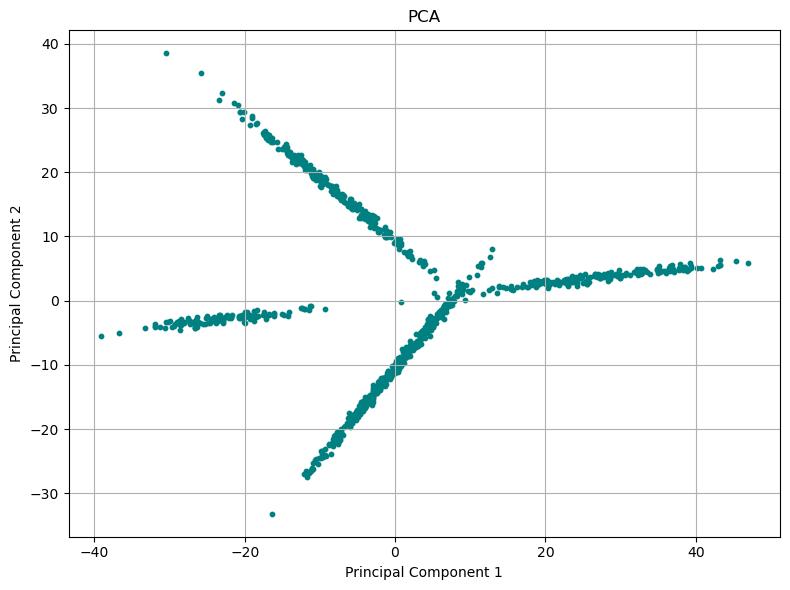

In [18]:
if k == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(tranformed_data[:, 0], tranformed_data[:, 1], c='teal', marker='o', s=10)
    plt.title('PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.tight_layout()
    plt.savefig('pca.png')
    plt.show()

# UMAP

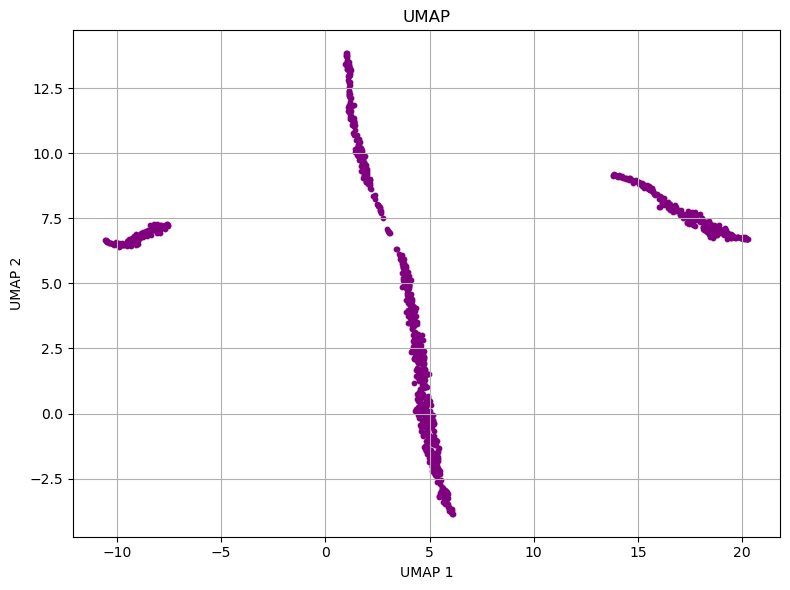

In [19]:
import umap
fit = umap.UMAP(n_components=2)
u = fit.fit_transform(standardized_data)
plt.figure(figsize=(8, 6))
plt.scatter(u[:, 0], u[:, 1], c='purple', marker='o', s=10)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')
plt.grid()
plt.tight_layout()
plt.savefig('umap.png')
plt.show()

# tSNE

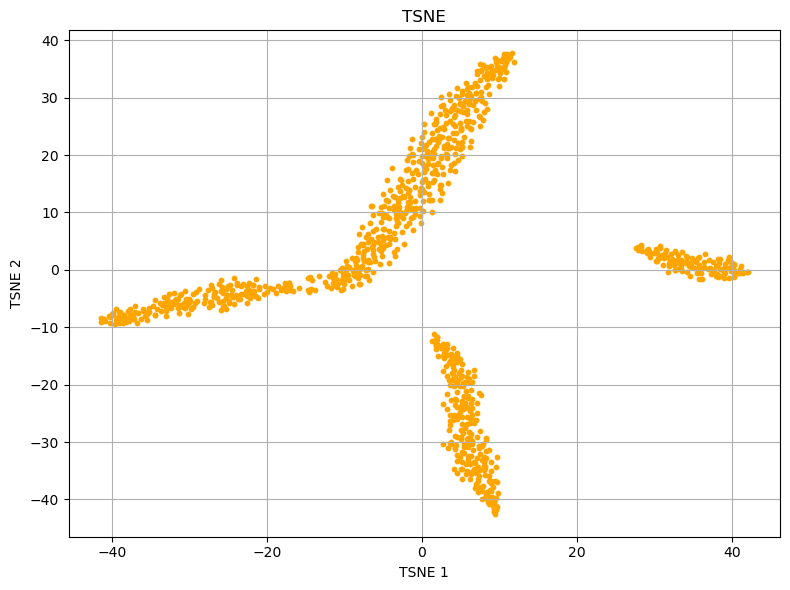

In [20]:
from sklearn.manifold import TSNE
fit = TSNE(n_components=2)
t = fit.fit_transform(standardized_data)
plt.figure(figsize=(8, 6))
plt.scatter(t[:, 0], t[:, 1], c='orange', marker='o', s=10)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE')
plt.grid()
plt.tight_layout()
plt.savefig('tsne.png')
plt.show()